In [16]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Khởi tạo PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='japan')  # cần chạy một lần để tải và load model vào bộ nhớ


[2024/07/05 10:14:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\rec\\japan\\japan_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320'

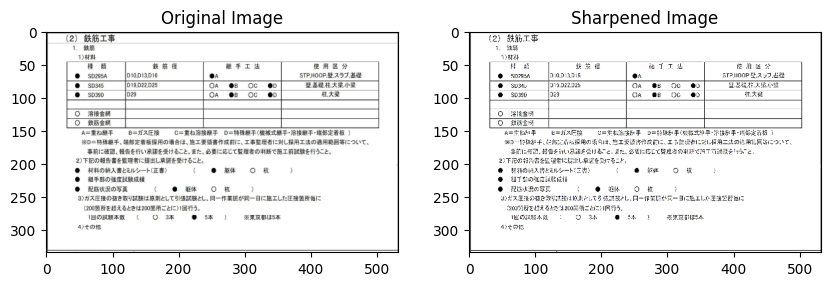

In [49]:
img_path = 'test_paddleOCR.png'

image = cv2.imread(img_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  6.5, -1],
                           [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_sharpen)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)); plt.title("Sharpened Image")
plt.show()

[2024/07/05 10:46:05] ppocr DEBUG: dt_boxes num : 133, elapsed : 0.413759708404541
[2024/07/05 10:46:06] ppocr DEBUG: cls num  : 133, elapsed : 0.9494507312774658
[2024/07/05 10:46:20] ppocr DEBUG: rec_res num  : 133, elapsed : 13.681757926940918
[[[87.0, 9.0], [210.0, 8.0], [211.0, 25.0], [87.0, 26.0]], ('コンクリートエ事', 0.9859914183616638)]
[[[63.0, 35.0], [82.0, 35.0], [82.0, 43.0], [63.0, 43.0]], ('1：.', 0.6989982724189758)]
[[[186.0, 33.0], [236.0, 33.0], [236.0, 43.0], [186.0, 43.0]], ('+二ンウリ-', 0.6548470854759216)]
[[[232.0, 33.0], [364.0, 33.0], [364.0, 43.0], [232.0, 43.0]], ('一ト上争即調音閉し王', 0.7027702927589417)]
[[[364.0, 33.0], [437.0, 31.0], [438.0, 42.0], [365.0, 44.0]], ('はJＡ555:201', 0.6172307133674622)]
[[[438.0, 33.0], [500.0, 33.0], [500.0, 44.0], [438.0, 44.0]], ('日年川ニ上る:', 0.6475540995597839)]
[[[78.0, 53.0], [333.0, 53.0], [333.0, 66.0], [78.0, 66.0]], ('1種類およひ證計基準弾度Fとスランプの旨す', 0.797752857208252)]
[[[83.0, 73.0], [107.0, 73.0], [107.0, 85.0], [83.0, 85.0]], ('普通', 0.534414

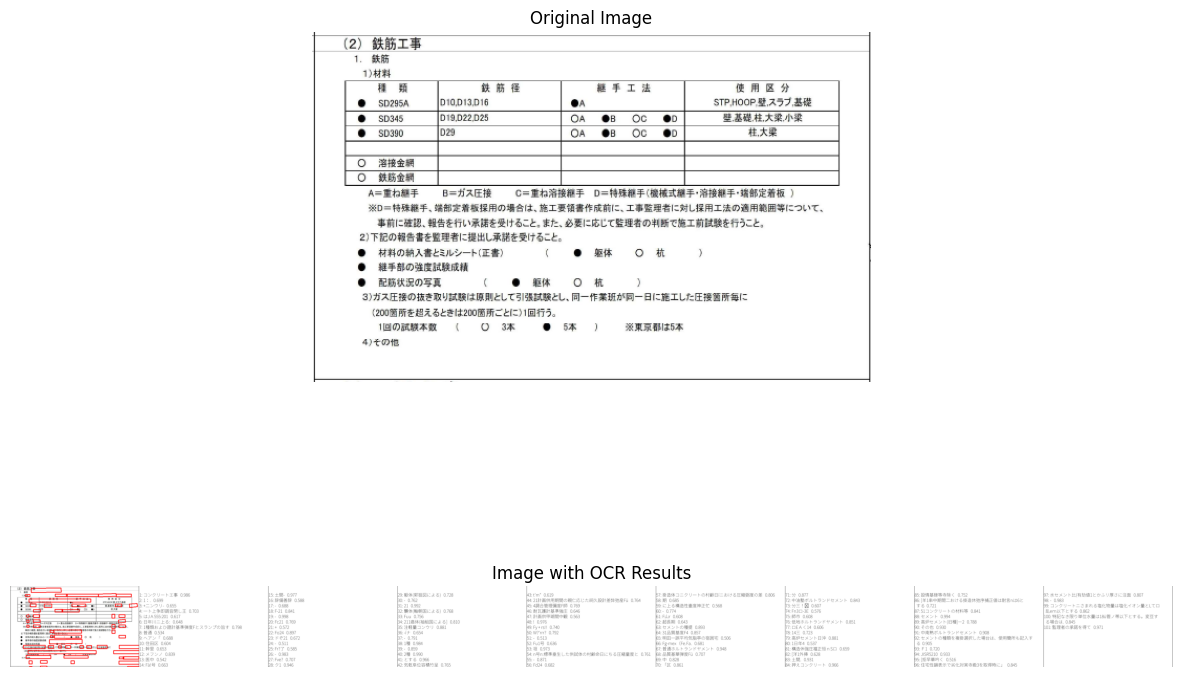

In [56]:
# Nhận dạng văn bản từ hình ảnh sau khi tiền xử lý
result = ocr.ocr(sharp_img, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# Vẽ kết quả nhận dạng lên ảnh gốc
result = result[0]
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image_rgb, boxes, txts, scores, font_path='NotoSansJP-VariableFont_wght.ttf')
im_show = Image.fromarray(im_show)

# Hiển thị hình ảnh gốc và hình ảnh với kết quả OCR
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Hiển thị hình ảnh gốc
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Hiển thị hình ảnh với kết quả OCR
axes[1].imshow(im_show)
axes[1].set_title('Image with OCR Results')
axes[1].axis('off')

plt.show()

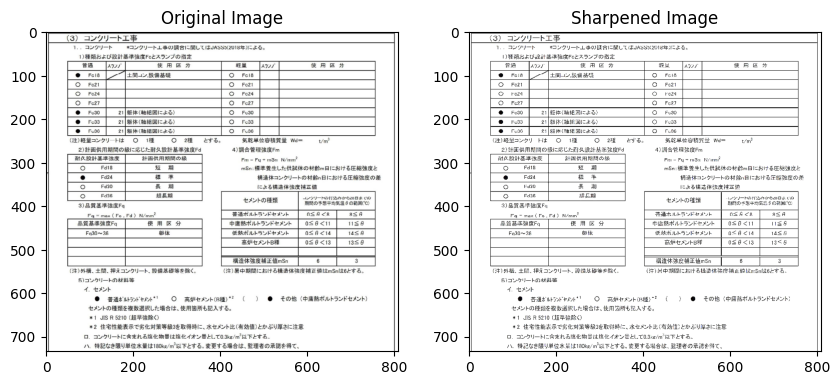

In [51]:
img_path = 'test_find_rectangle.png'

image = cv2.imread(img_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  6.5, -1],
                           [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_sharpen)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)); plt.title("Sharpened Image")
plt.show()

(-0.5, 3508.5, 2480.5, -0.5)

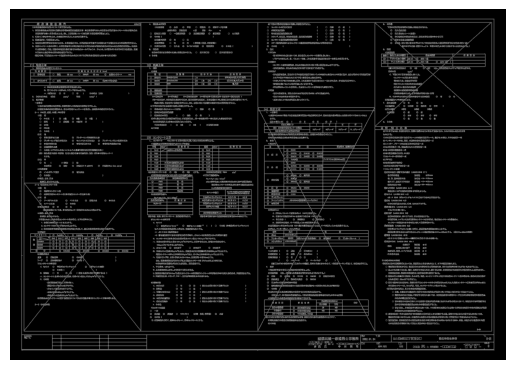

In [108]:
image = cv2.imread('ocr_file_image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(image_gray, 150, 200)
plt.imshow(edges,cmap = 'gray')
plt.axis('off')

<function matplotlib.pyplot.show(close=None, block=None)>

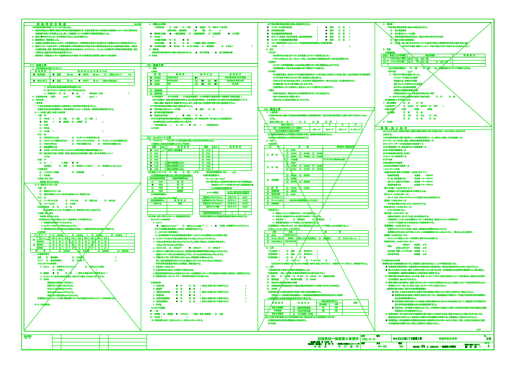

In [109]:
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

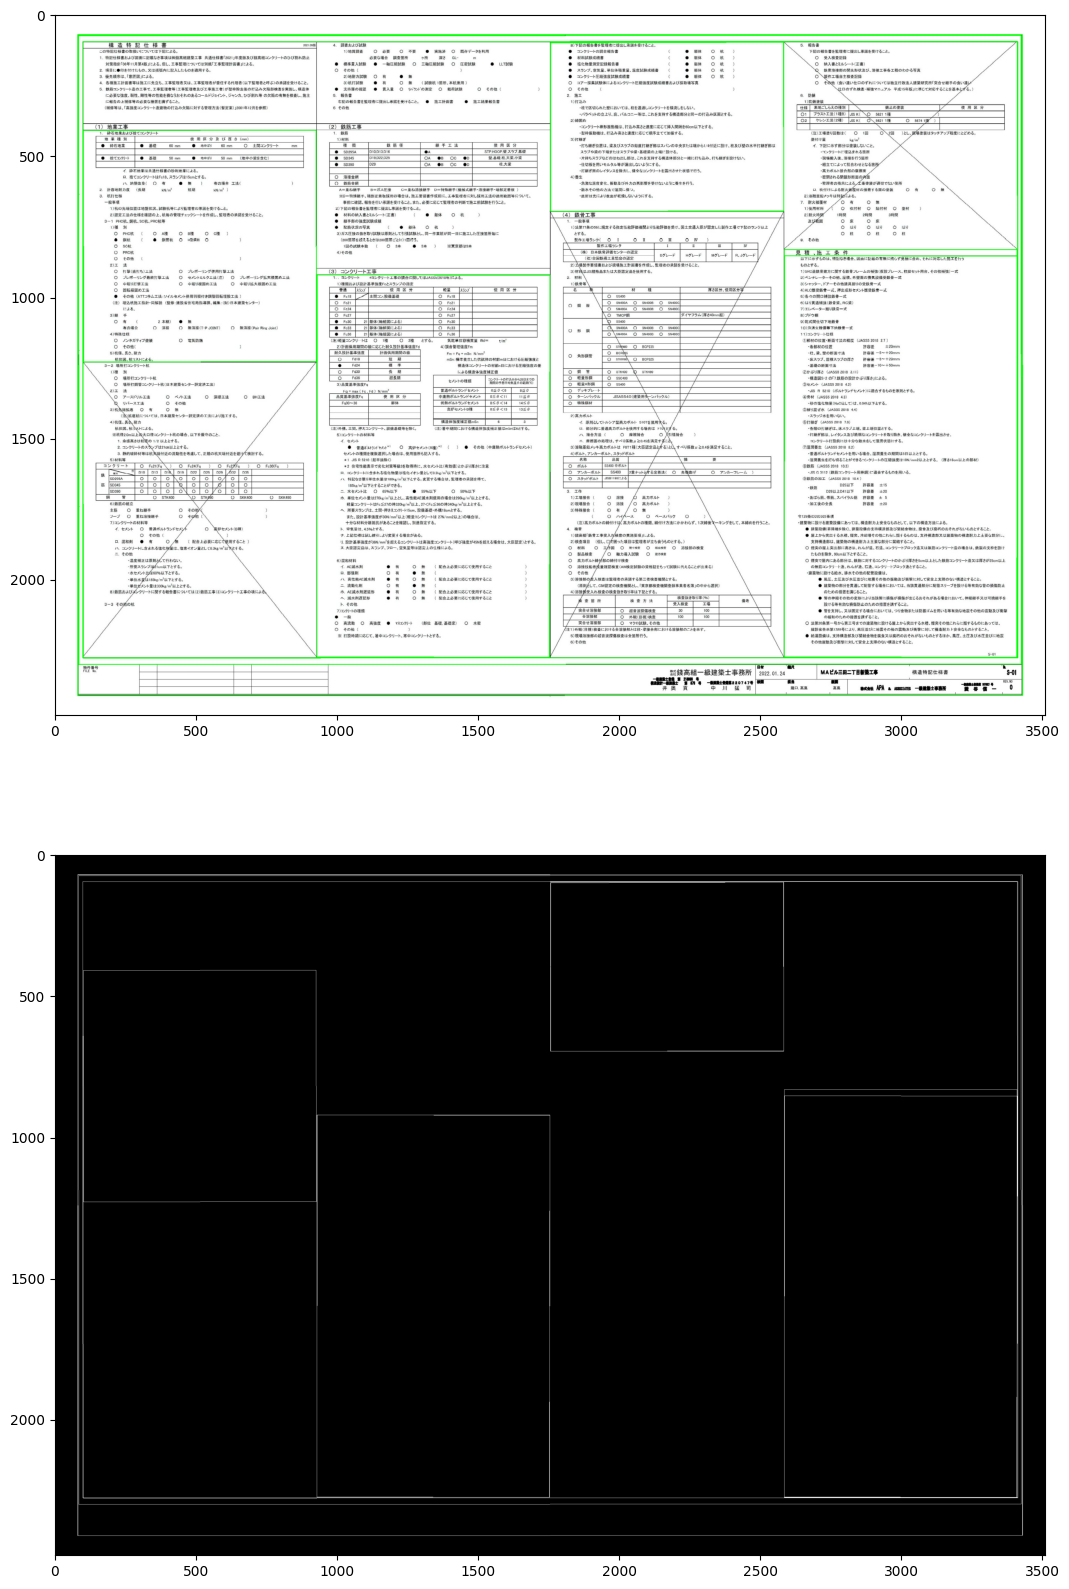

In [124]:
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

threshold_area = 200000  # Ngưỡng diện tích
selected_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]

image_copy = image.copy()

mask = np.zeros_like(image_gray)

for contour in selected_contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.1 * peri, True)

    # Nếu contour xấp xỉ là hình chữ nhật
    if len(approx) == 4:
        # Vẽ contour lên ảnh sao chép
        cv2.drawContours(image_copy, [approx], -1, (0, 255, 0), 2)
        cv2.drawContours(mask, [approx], -1, 255)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1); plt.imshow(image_copy)
plt.subplot(2,1,2); plt.imshow(mask, cmap='gray')


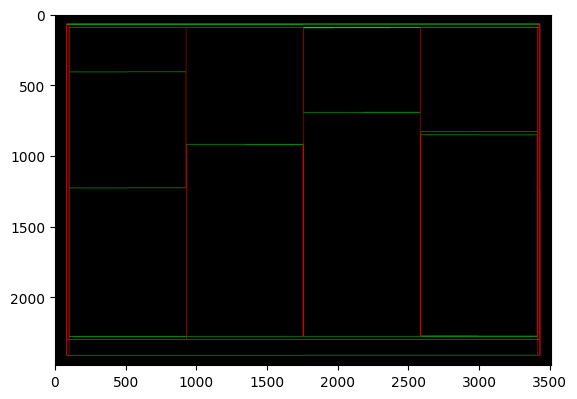

In [132]:
import cv2
import numpy as np

# Đọc ảnh nhị phân chứa các đường thẳng ngang và dọc
binary_image = mask.copy()

# Phát hiện các đường thẳng bằng Hough Line Transform
lines = cv2.HoughLinesP(binary_image, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Tạo ảnh mới để vẽ các đường thẳng
line_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)

# Lặp qua từng đường thẳng phát hiện được
for line in lines:
    x1, y1, x2, y2 = line[0]
    
    # Tính độ dốc của đường thẳng
    slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else np.inf
    
    # Kiểm tra xem đường thẳng có gần với đường thẳng ngang hay không (slope gần 0)
    if np.abs(slope) < 0.1:  # Chọn ngưỡng 0.1 cho slope gần với 0
        # Đường thẳng là đường thẳng ngang, vẽ màu xanh
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    else:
        # Đường thẳng là đường thẳng dọc, vẽ màu đỏ
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

for line in lines: 
    x1, y1, x2, y2 = line[0]
    
    # Tính độ dốc của đường thẳng
    slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else np.inf
    
    above = y1
    under = y1
    if np.abs(slope) > 0.1:
        for i in range(y1 - 2, 0, -1):
            if np.array_equal(line_image[i, x1], [0, 255, 0]):  # Kiểm tra màu xanh
                above = i
                break
        for i in range(y1 + 2, binary_image.shape[0]):
            if np.array_equal(line_image[i, x1], [0, 255, 0]):  # Kiểm tra màu xanh
                under = i
                break
        
        # Vẽ đường thẳng dọc kéo dài
        cv2.line(line_image, (x1, above), (x1, under), (255, 0, 0), 2)    
# Hiển thị ảnh với các đường thẳng đã vẽ màu
plt.imshow(line_image)


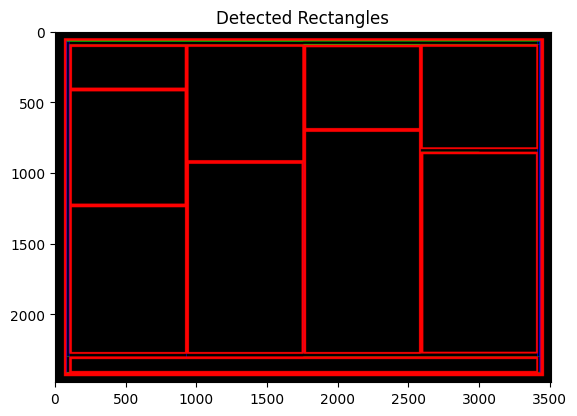

Detected Rectangles:
Rectangle 1: x=63, y=51, width=3389, height=2388
Rectangle 2: x=1772, y=712, width=799, height=1558
Rectangle 3: x=2600, y=870, width=797, height=1398
Rectangle 4: x=945, y=938, width=797, height=1332
Rectangle 5: x=118, y=1245, width=801, height=1025
Rectangle 6: x=942, y=111, width=805, height=803
Rectangle 7: x=118, y=426, width=798, height=795
Rectangle 8: x=2596, y=111, width=803, height=712
Rectangle 9: x=1773, y=114, width=798, height=573
Rectangle 10: x=118, y=2318, width=3281, height=86
Rectangle 11: x=119, y=112, width=798, height=289


In [150]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh đã xử lý vẽ các đường thẳng dọc và ngang không overlap
# line_image = cv2.imread('processed_lines_image.png')

# Chuyển đổi sang ảnh grayscale
gray_image_2 = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)

# Áp dụng phép threshold để chuyển đổi thành ảnh nhị phân
_, binary_image_2 = cv2.threshold(gray_image_2, 1, 255, cv2.THRESH_BINARY)

# Tìm contours trong ảnh nhị phân
contours, _ = cv2.findContours(binary_image_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Lặp qua từng contour để vẽ và trích xuất hình chữ nhật
rectangles = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Lọc các hình chữ nhật có diện tích và tỷ lệ phù hợp
    area = cv2.contourArea(contour)
    if area > 200000 and w > 20 and h > 20 and h < gray_image_2.shape[0]:
        rectangles.append((x, y, w, h))
        cv2.rectangle(line_image, (x, y), (x + w, y + h), (0, 0, 255), 1)  # Vẽ bounding box màu đỏ

rectangles_sorted = sorted(rectangles, key=lambda rect: rect[2] * rect[3], reverse=True)

# Hiển thị ảnh với các bounding box đã vẽ
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Rectangles')
plt.show()

# In ra các hình chữ nhật trích xuất được
print("Detected Rectangles:")
for i, (x, y, w, h) in enumerate(rectangles_sorted, 1):
    print(f"Rectangle {i}: x={x}, y={y}, width={w}, height={h}")


In [151]:
import os 

original_image = cv2.imread('ocr_file_image.jpg')

for i, (x, y, w, h) in enumerate(rectangles_sorted[1:], start=1):
    # Cắt phần hình chữ nhật từ ảnh gốc
    image_crop = original_image[y-10:y+h+10, x-10:x+w+10]
    
    # Đổi định dạng màu từ BGR sang RGB để phù hợp với PaddleOCR
    image_rgb = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
    
    # Nhận dạng văn bản từ hình ảnh cắt được
    result = ocr.ocr(image_rgb, cls=True)
    
    # Lưu kết quả nhận dạng vào file text
    result_text = ''
    for idx in range(len(result)):
        res = result[idx]
        for line in res:
            result_text += line[1][0] + '\n'
    
    # Lưu kết quả vào thư mục image_result
    save_path = os.path.join('image_result', f'result_{i}.txt')
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(result_text)
    
    # Vẽ kết quả nhận dạng lên ảnh gốc 
    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]
    im_show = draw_ocr(image_rgb, boxes, txts, scores, font_path='NotoSansJP-VariableFont_wght.ttf')
    im_show = Image.fromarray(im_show)
    
    # Lưu ảnh kết quả 
    im_show.save(os.path.join('image_result', f'result_{i}.jpg'))

print("Processing completed and results saved in 'image_result' folder.")

[2024/07/05 14:15:14] ppocr DEBUG: dt_boxes num : 141, elapsed : 0.6274807453155518
[2024/07/05 14:15:15] ppocr DEBUG: cls num  : 141, elapsed : 0.38333940505981445
[2024/07/05 14:15:23] ppocr DEBUG: rec_res num  : 141, elapsed : 8.181999444961548
[2024/07/05 14:15:24] ppocr DEBUG: dt_boxes num : 220, elapsed : 0.7898380756378174
[2024/07/05 14:15:25] ppocr DEBUG: cls num  : 220, elapsed : 0.9268949031829834
[2024/07/05 14:15:38] ppocr DEBUG: rec_res num  : 220, elapsed : 13.153193712234497
[2024/07/05 14:15:39] ppocr DEBUG: dt_boxes num : 228, elapsed : 0.8238787651062012
[2024/07/05 14:15:40] ppocr DEBUG: cls num  : 228, elapsed : 0.9424209594726562
[2024/07/05 14:15:56] ppocr DEBUG: rec_res num  : 228, elapsed : 15.091690301895142
[2024/07/05 14:15:57] ppocr DEBUG: dt_boxes num : 131, elapsed : 0.8902013301849365
[2024/07/05 14:15:58] ppocr DEBUG: cls num  : 131, elapsed : 0.7872917652130127
[2024/07/05 14:16:08] ppocr DEBUG: rec_res num  : 131, elapsed : 9.655903577804565
[2024/07/